# Short Time Fourier Transform (STFT)

ใน tutorial ที่ 2 ของบทเรียนนี้ เราได้เรียนรู้เกี่ยวกับการแปลงข้อมูล $x[n]$ จาก time domain ไปเป็น $X[k]$ ใน frequency domain ผ่านการใช้ discrete Fourier transform (DFT)

หากเรา plot ดูข้อมูล $X[k]$ จะสามารถบอกได้ว่า signal ที่เรากำลังวิเคราะห์อยู่มีสัญญาณที่ความถี่ใดบ้าง และมีสัดส่วนจากความถี่ไหนมากหรือน้อยกว่ากัน

หลังจากนั้นเราก็ได้ลองกำจัดความถี่บางส่วนออกจาก signal โดยการทำ filtering ด้วยฟังก์ชันที่เราเรียกว่า window

<br>

ใน tutorial นี้เราจะมาลองดู signal ที่มีหน้าตาซับซ้อนมากยิ่งขึ้น เช่น chirp signal ซึ่งเป็น signal ที่มีความถี่ในช่วงเวลาใด ๆ เพียงค่าเดียว แต่เมื่อเวลาเปลี่ยนไป ค่าความถี่นั้นจะเปลี่ยนไป และมีค่าสูงขึ้นเรื่อย ๆ ตามแกนเวลา

<iframe width="560" height="315" src="https://www.youtube.com/embed/M_QiUwYmDgU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

[Slides: Short-Time Fourier Transform (STFT)](https://github.com/ichatnun/brainCodeCamp2023_lectures/blob/main/SignalProcessing/signal_part3_stft.pdf)

## Analyzing chirp signals using DFT

In [1]:
import numpy as np
from scipy.signal import chirp, stft, spectrogram
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import math

ฟังก์ชันจาก tutorial ก่อนหน้า

In [2]:
def compute_DFT(x_sampled, f_s):

    # คำนวณจำนวนจุดที่มีใน signal
    num_points = x_sampled.shape[0]

    # ใช้ FFT ในการแปลงข้อมูลจาก time domain ไปเป็น frequency domain
    X_fft = fft(x_sampled)

    # สร้างแกนความถี่ (frequency)
    freq = np.fft.fftfreq(num_points, d=1/f_s)

    return X_fft, freq


def plot_discrete_time_freq_signal(x_sampled, X_fft, freq):

    fig, ax = plt.subplots(2, 1, figsize=(15, 8))
    fig.tight_layout(pad=5.0)

    # Plot x[n] (ในที่นี้เราจะใช้ plot แทน scatter เพื่อช่วยให้ดูหน้าตา signal ได้ง่ายขึ้น)
    ax[0].plot(range(x_sampled.shape[0]), x_sampled, c='b')
    ax[0].set(xlabel='n', ylabel='x[n]')
    ax[0].set_title(f"Discrete time signal x[n] sampled from x(t)")
    ax[0].grid(True)

    # Plot magnitude ของ X[k]
    ax[1].plot(freq, np.abs(X_fft), 'b')
    ax[1].set(xlabel='Frequency (Hz)', ylabel='|X[k]|')
    ax[1].set_title(f"X[k], DFT of x[n]")
    ax[1].set_xticks(np.arange(np.min(freq), np.max(freq), 10))
    ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 70)
    ax[1].grid(True)

    plt.show()

ทดลองสร้าง Chirp signal

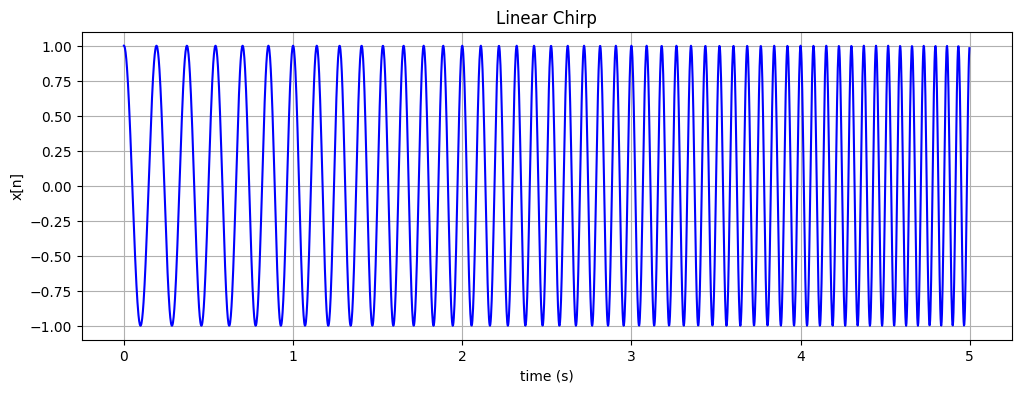

In [3]:
f_s = 500 # อัตราการเก็บข้อมูล หรือ sampling rate (samples/s หรือ Hz)
duration = 5 # ระยะเวลาของ signal (s)

# คำนวณค่า sampling period (ระยะห่างระหว่างจุดที่เก็บมาสองจุดในแกนเวลา)
T = 1/f_s

# คำนวณจำนวนจุดที่มีใน signal
num_points = math.floor(f_s*duration)

# สร้างแกนเวลา
t_sampled = np.linspace(0.0, num_points*T, num_points, endpoint=False)

# สร้าง chirp signal ที่มีค่าความถี่เริ่มต้นที่ 5 Hz และมีค่าความถี่สูงขึ้นเรื่อยๆ จนไปถึงค่า 15 Hz ในระยะเวลา 'duration' วินาที
x_chirp = chirp(t_sampled, f0=5, f1=15, t1=duration, method='linear')

fig, ax = plt.subplots(figsize=(12, 4))

# ถึงแม้ว่าข้อมูลเราจะเป็น discrete-time signal แต่สำหรับตัวอย่างนี้เราจะใช้ plot
# แทน scatter ที่เราใช้กันมาใน part แรกๆ เพื่อให้สามารถดูหน้าตาของ signal ได้ง่ายขึ้น
# รวมถึงใส่ xlabel เป็นเวลา แทนที่จะเป็น n
ax.plot(t_sampled, x_chirp, 'b')
ax.set_title(f"Linear Chirp")
ax.set(xlabel='time (s)', ylabel='x[n]')
ax.grid(True)
plt.show()

ลองใช้ `fft` แปลง $x_\text{chirp}$ จาก time domain ไปเป็น frequency domain ดู

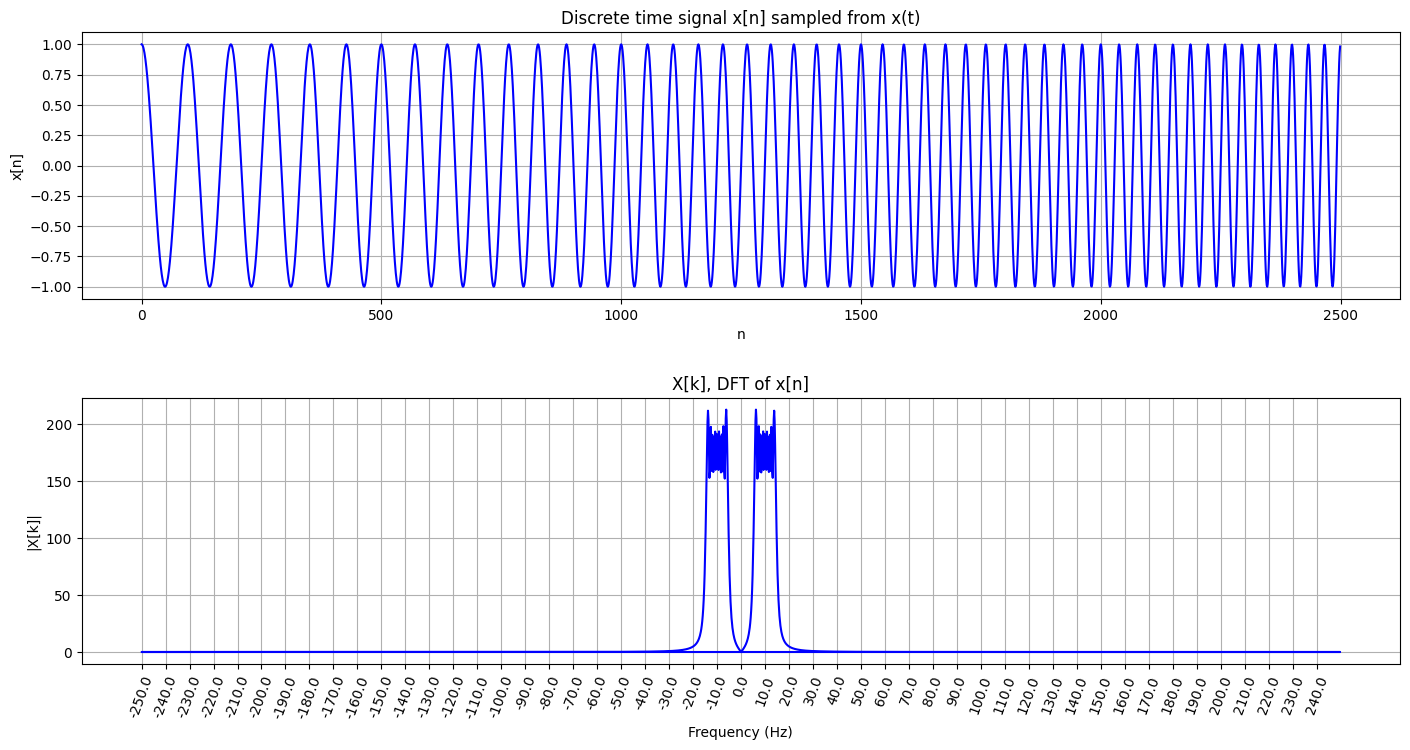

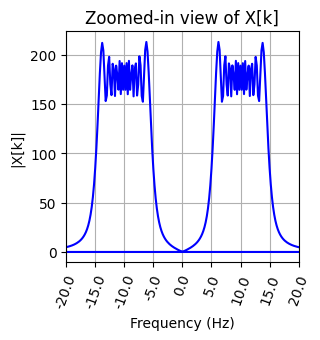

In [4]:
# คำนวณ DFT ของ x[n] และ แกน freq สำหรับใช้ plot
X_chirp_fft, freq = compute_DFT(x_chirp, f_s)

# Plot ผลที่ได้
plot_discrete_time_freq_signal(x_chirp, X_chirp_fft, freq)

# Plot zoomed-in view ของ |X[k]|
fig = plt.figure(figsize=(3, 3))
ax = fig.gca()
ax.plot(freq, np.abs(X_chirp_fft), c='b')
ax.grid(True)
ax.set_xticks(np.arange(np.min(freq), np.max(freq), 5))
ax.set_xticklabels(ax.get_xticks(), rotation=70)
ax.set(xlabel='Frequency (Hz)', ylabel='|X[k]|')
ax.set_title(f"Zoomed-in view of X[k]")
plt.xlim(-20, 20)
plt.show()

จากการดู chirp signal ใน frequency domain เราพบว่า ข้อมูลของเรามีค่าสูงในบริเวณ ค่าความถี่ประมาณ 5 Hz ถึง 15 Hz (และค่าความถี่ประมาณ -15 Hz ถึง -5 Hz) ซึ่งสอดคล้องกับค่าความถี่ที่เราใช้ในการสร้าง chirp signal อันนี้

แต่มีสิ่งหนึ่งที่เราไม่สามารถบอกได้จากข้อมูลใน frequency domain เลย ก็คือ เราไม่สามารถบอกได้ว่าค่าความถี่เหล่านั้นเกิดขึ้นที่เวลาเท่าไหร่ของ time signal บ้าง

ตัวอย่าง เช่น

1.   chirp signal ที่มีความถี่เริ่มต้น 5 Hz แล้วมีค่าความถี่เพิ่มขึ้นเรื่อย ๆ ตามแกนเวลาไปเป็น 15 Hz
2.   chirp signal ที่มีความถี่เริ่มต้น 15 Hz แล้วมีค่าความถี่ลดลงเรื่อย ๆ ตามแกนเวลาไปเป็น 5 Hz

จะมี magnitude ใน frequency domain เหมือนกันดังตัวอย่างด้านล่าง

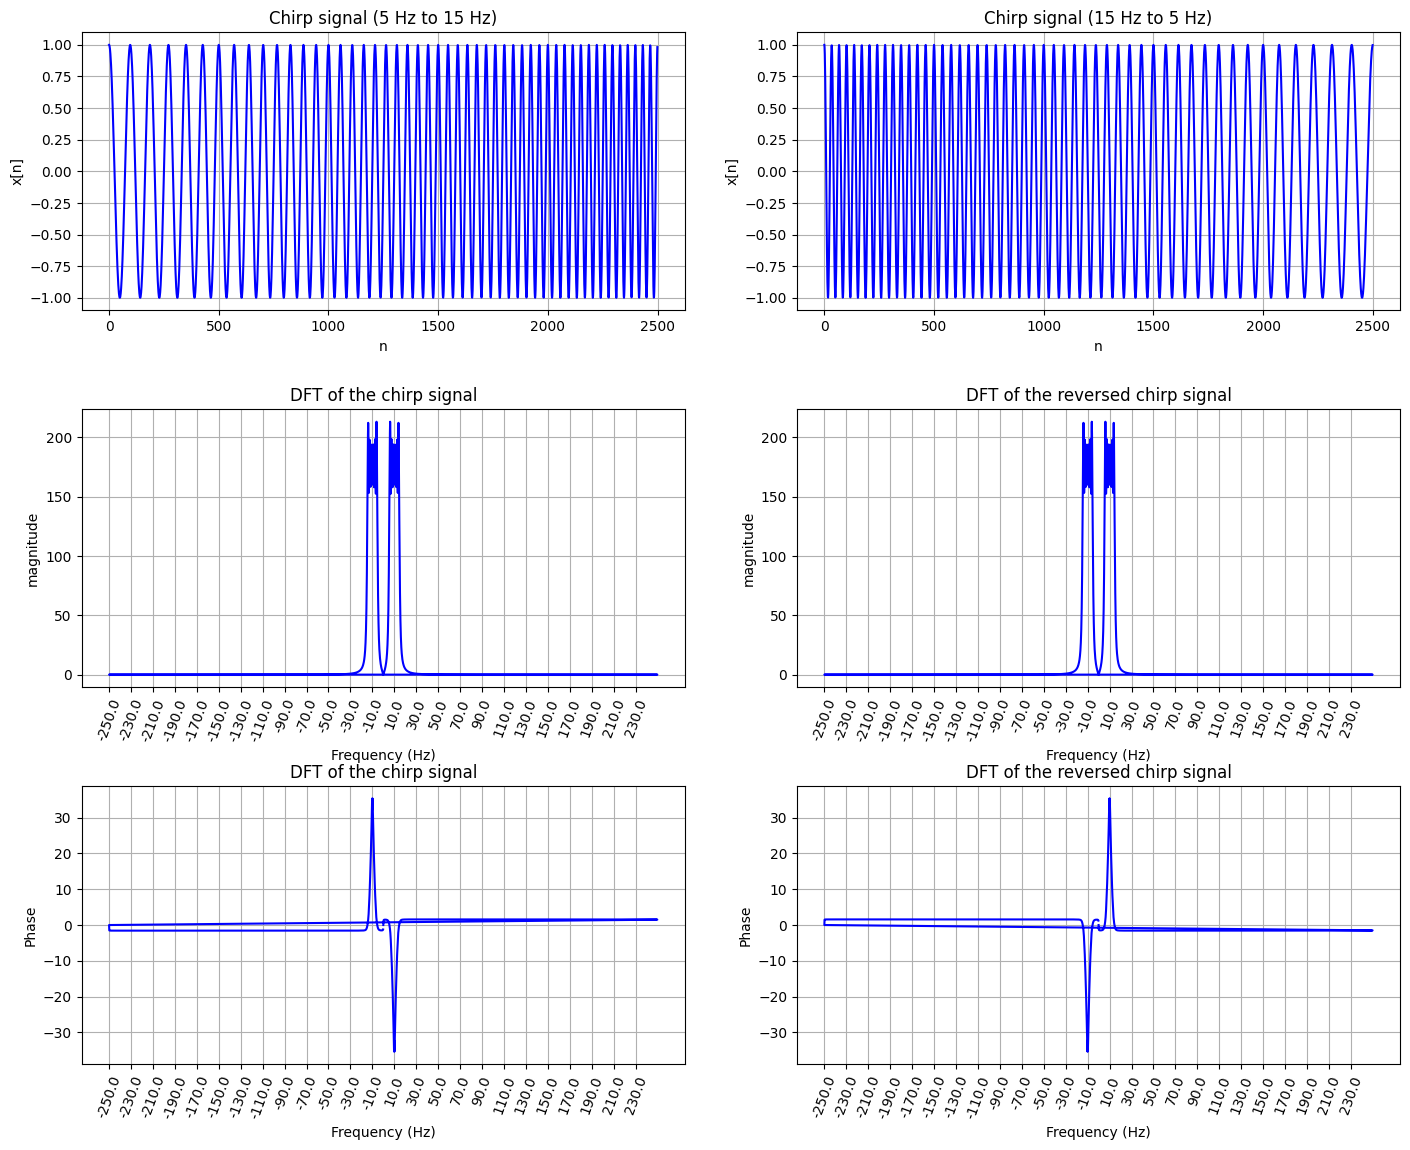

In [5]:
# สร้าง chirp signal ที่มีค่าความถี่เริ่มต้นที่ 15 Hz และมีค่าความถี่ลดลงเรื่อยๆ จนไปถึงค่า 5 Hz ในระยะเวลา 5 วินาที
x_chirp_reverse = chirp(t_sampled, f0=15, f1=5, t1=duration, method='linear')

# คำนวณ DFT ของ x[n] และ แกน freq สำหรับใช้ plot
X_chirp_reverse_fft, freq = compute_DFT(x_chirp_reverse, f_s)

# Plot ผลที่ได้
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.tight_layout(pad=5.0)

# Plot chirp signal
ax[0, 0].plot(range(x_chirp.shape[0]), x_chirp, c='b')
ax[0, 0].set(xlabel='n', ylabel='x[n]')
ax[0, 0].set_title(f"Chirp signal (5 Hz to 15 Hz)")
ax[0, 0].grid(True)

# Plot magnitude ของ FFT ของ x_chirp
ax[1, 0].plot(freq, np.abs(X_chirp_fft),'b')
ax[1, 0].set(xlabel='Frequency (Hz)', ylabel='magnitude')
ax[1, 0].set_title(f"DFT of the chirp signal")
ax[1, 0].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
ax[1, 0].set_xticklabels(ax[1, 0].get_xticks(), rotation=70)
ax[1, 0].grid(True)

# Plot phase ของ X[k]
ax[2, 0].plot(freq, np.unwrap(np.angle(X_chirp_fft)), 'b')
ax[2, 0].set(xlabel='Frequency (Hz)', ylabel='Phase')
ax[2, 0].set_title(f"DFT of the chirp signal")
ax[2, 0].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
ax[2, 0].set_xticklabels(ax[2, 0].get_xticks(), rotation=70)
ax[2, 0].grid(True)

# Plot reversed chirp signal
ax[0, 1].plot(range(x_chirp_reverse.shape[0]), x_chirp_reverse, c='b')
ax[0, 1].set(xlabel='n', ylabel='x[n]')
ax[0, 1].set_title(f"Chirp signal (15 Hz to 5 Hz)")
ax[0, 1].grid(True)

# Plot magnitude ของ FFT ของ x_chirp_reverse
ax[1, 1].plot(freq, np.abs(X_chirp_reverse_fft), 'b')
ax[1, 1].set(xlabel='Frequency (Hz)',ylabel='magnitude')
ax[1, 1].set_title(f"DFT of the reversed chirp signal")
ax[1, 1].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
ax[1, 1].set_xticklabels(ax[1, 1].get_xticks(), rotation=70)
ax[1, 1].grid(True)

# Plot phase ของ X[k]
ax[2, 1].plot(freq, np.unwrap(np.angle(X_chirp_reverse_fft)), 'b')
ax[2, 1].set(xlabel='Frequency (Hz)', ylabel='Phase')
ax[2, 1].set_title(f"DFT of the reversed chirp signal")
ax[2, 1].set_xticks(np.arange(np.min(freq), np.max(freq), 20))
ax[2, 1].set_xticklabels(ax[2, 1].get_xticks(), rotation=70)
ax[2, 1].grid(True)

plt.show()

Magnitude ของ DFT ที่คำนวณได้จาก chirp ทั้งสองแบบ มีหน้าตาเหมือนกันเลย แต่จะสังเกตได้ว่า phase จะแตกต่างกัน หมายความว่าถ้าเราดูเฉพาะ magnitude ของ DFT ของ signal ทั้งสอง โดยที่เราไม่สนใจ phase เลย เราก็จะไม่รู้เลยว่า signal ทั้งสองอันนี้มันแตกต่างกัน

## Short-Time Fourier Transform (STFT)

หากเราต้องการจะรู้ว่า signal นี้มีค่าความถี่อะไรบ้าง โดยที่อยากจะรู้ด้วยว่าค่าความถี่แต่ละอัน มันเกิดขึ้น ณ เวลาที่เท่าไหร่บ้าง เราจะสามารถนำเอา `fft` มาประยุกต์ใช้ได้อย่างไรบ้าง

วิธีที่ตรงไปตรงมา ก็คือเราแบ่ง time signal ของเราเป็นส่วนเล็ก ๆ (segment) แล้วค่อยใช้ `fft` วิเคราะห์แต่ละ segment แยกกัน

สมมติว่าเราแบ่ง signal ของเราออกเป็นสองส่วนเราก็จะได้ผลดังนี้

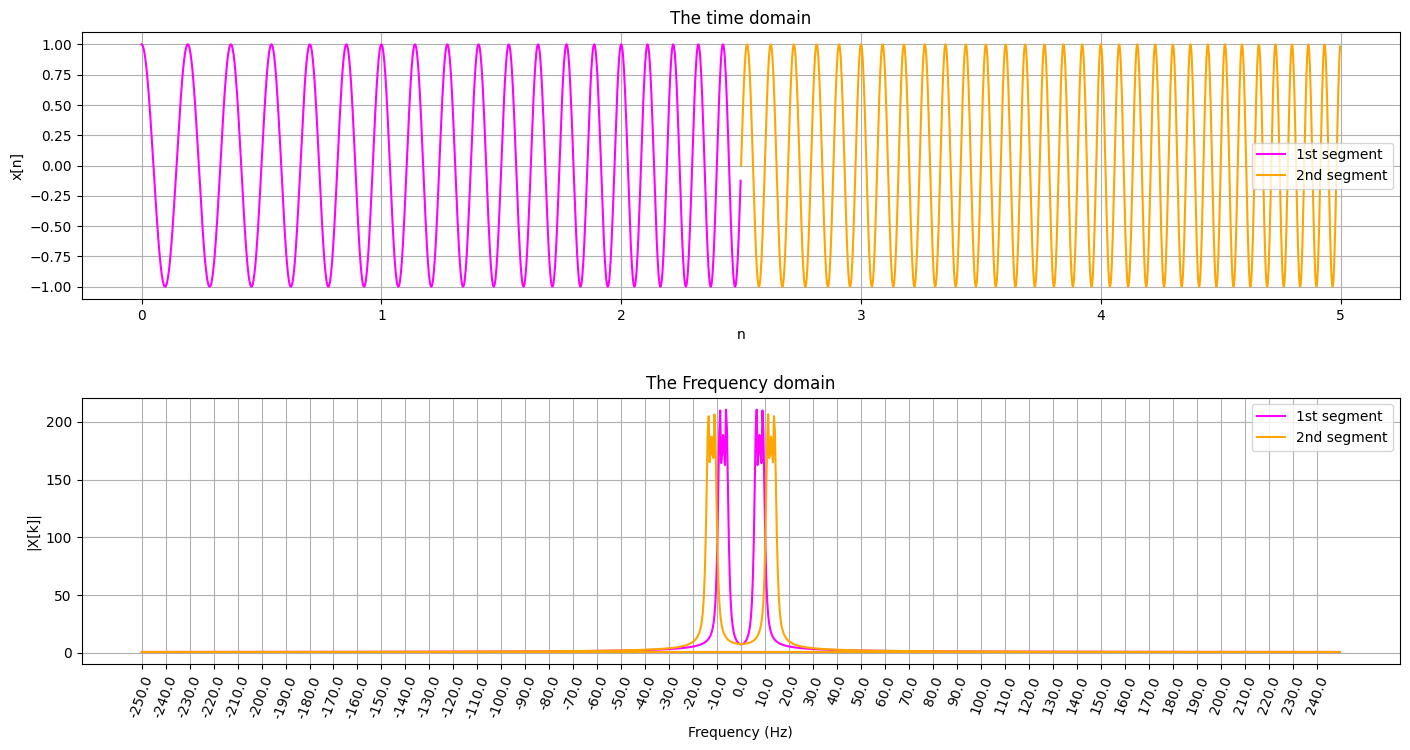

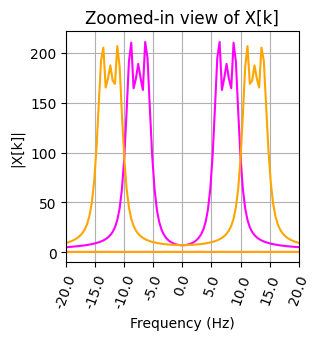

In [6]:
# สร้าง segment แรก โดยการดึงข้อมูลครึ่งแรกของ chirp
x_chirp_first = x_chirp[:int(x_chirp.shape[0]/2)]

# สร้าง segment ที่สอง โดยการดึงข้อมูลครึ่งหลังของ chirp
x_chirp_second = x_chirp[int(x_chirp.shape[0]/2):]

# คำนวณ DFT ของ segment แรก
X_fft_first, freq = compute_DFT(x_chirp_first, f_s)

# คำนวณ DFT ของ segment ที่สอง
X_fft_second, freq = compute_DFT(x_chirp_second, f_s)

# Plot ผลที่ได้
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
fig.tight_layout(pad=5.0)

# Plot ข้อมูลใน time domain
ax[0].plot(t_sampled[:int(x_chirp.shape[0]/2)], x_chirp_first, c='fuchsia', label='1st segment')
ax[0].plot(t_sampled[int(x_chirp.shape[0]/2):], x_chirp_second, c='orange', label='2nd segment')
ax[0].set(xlabel='n', ylabel='x[n]')
ax[0].set_title(f"The time domain")
ax[0].grid(True)
ax[0].legend()

# Plot ข้อมูลใน frequency domain
ax[1].plot(freq,np.abs(X_fft_first), c='fuchsia', label='1st segment')
ax[1].plot(freq,np.abs(X_fft_second), c='orange', label='2nd segment')
ax[1].set(xlabel='Frequency (Hz)', ylabel='|X[k]|')
ax[1].set_title(f"The Frequency domain")
ax[1].set_xticks(np.arange(np.min(freq), np.max(freq), 10))
ax[1].set_xticklabels(ax[1].get_xticks(), rotation=70)
ax[1].grid(True)
ax[1].legend()

# Plot zoomed-in view ของ |X[k]|
fig = plt.figure(figsize=(3, 3))
ax = fig.gca()
ax.plot(freq, np.abs(X_fft_first), c='fuchsia')
ax.plot(freq, np.abs(X_fft_second), c='orange')
ax.grid(True)
ax.set_xticks(np.arange(np.min(freq), np.max(freq), 5))
ax.set_xticklabels(ax.get_xticks(), rotation=70)
ax.set(xlabel='Frequency (Hz)', ylabel='|X[k]|')
ax.set_title(f"Zoomed-in view of X[k]")
plt.xlim(-20, 20)
plt.show()

จากผลด้านบน เราสังเกตเห็น


*   ครึ่งแรกของ chirp signal (เวลา $t=0 \ s$ ถึง $t=2.5 \ s$) มีค่าความถี่ประมาณ 5 Hz ถึง 10 Hz
*   ครึ่งหลังของ chirp signal (เวลา $t=2.5 \ s$ ถึง $t=5 \ s$) มีค่าความถี่ประมาณ 10 Hz ถึง 15 Hz

จะเห็นได้ว่าเราสามารถบอกข้อมูลเกี่ยวกับค่าความถี่ว่าเกิดขึ้นที่ช่วงประมาณเวลาไหนได้ละเอียดมากยิ่งขึ้น


หากเราต้องการระบุตำแหน่งในแกนเวลามากขึ้นอีก เราก็จะทำให้แต่ละ segment เล็กลงได้

การแบ่งให้ time signal มันสั้นลง แล้วคำนวณ DFT แยกในลักษณะนี้เป็นที่มาของชื่อเทคนิค Short-Time Fourier Transform (STFT)

## Spectrogram

ในส่วนสุดท้ายของ tutorial นี้ เราจะเรียกใช้ `scipy.signal.spectrogram` ในการคำนวณ STFT และแสดงผลในรูปแบบ spectrogram ได้อย่างง่ายดาย ซึ่ง spectrogram จะแสดงผลเป็นรูปภาพที่มีแกน x เป็น "เวลา", มีแกน y เป็นแกนความถี่ และ มีสีที่แสดงถึง magnitude ของ DFT ของ signal ที่ค่าความถี่และเวลาใดเวลาหนึ่ง

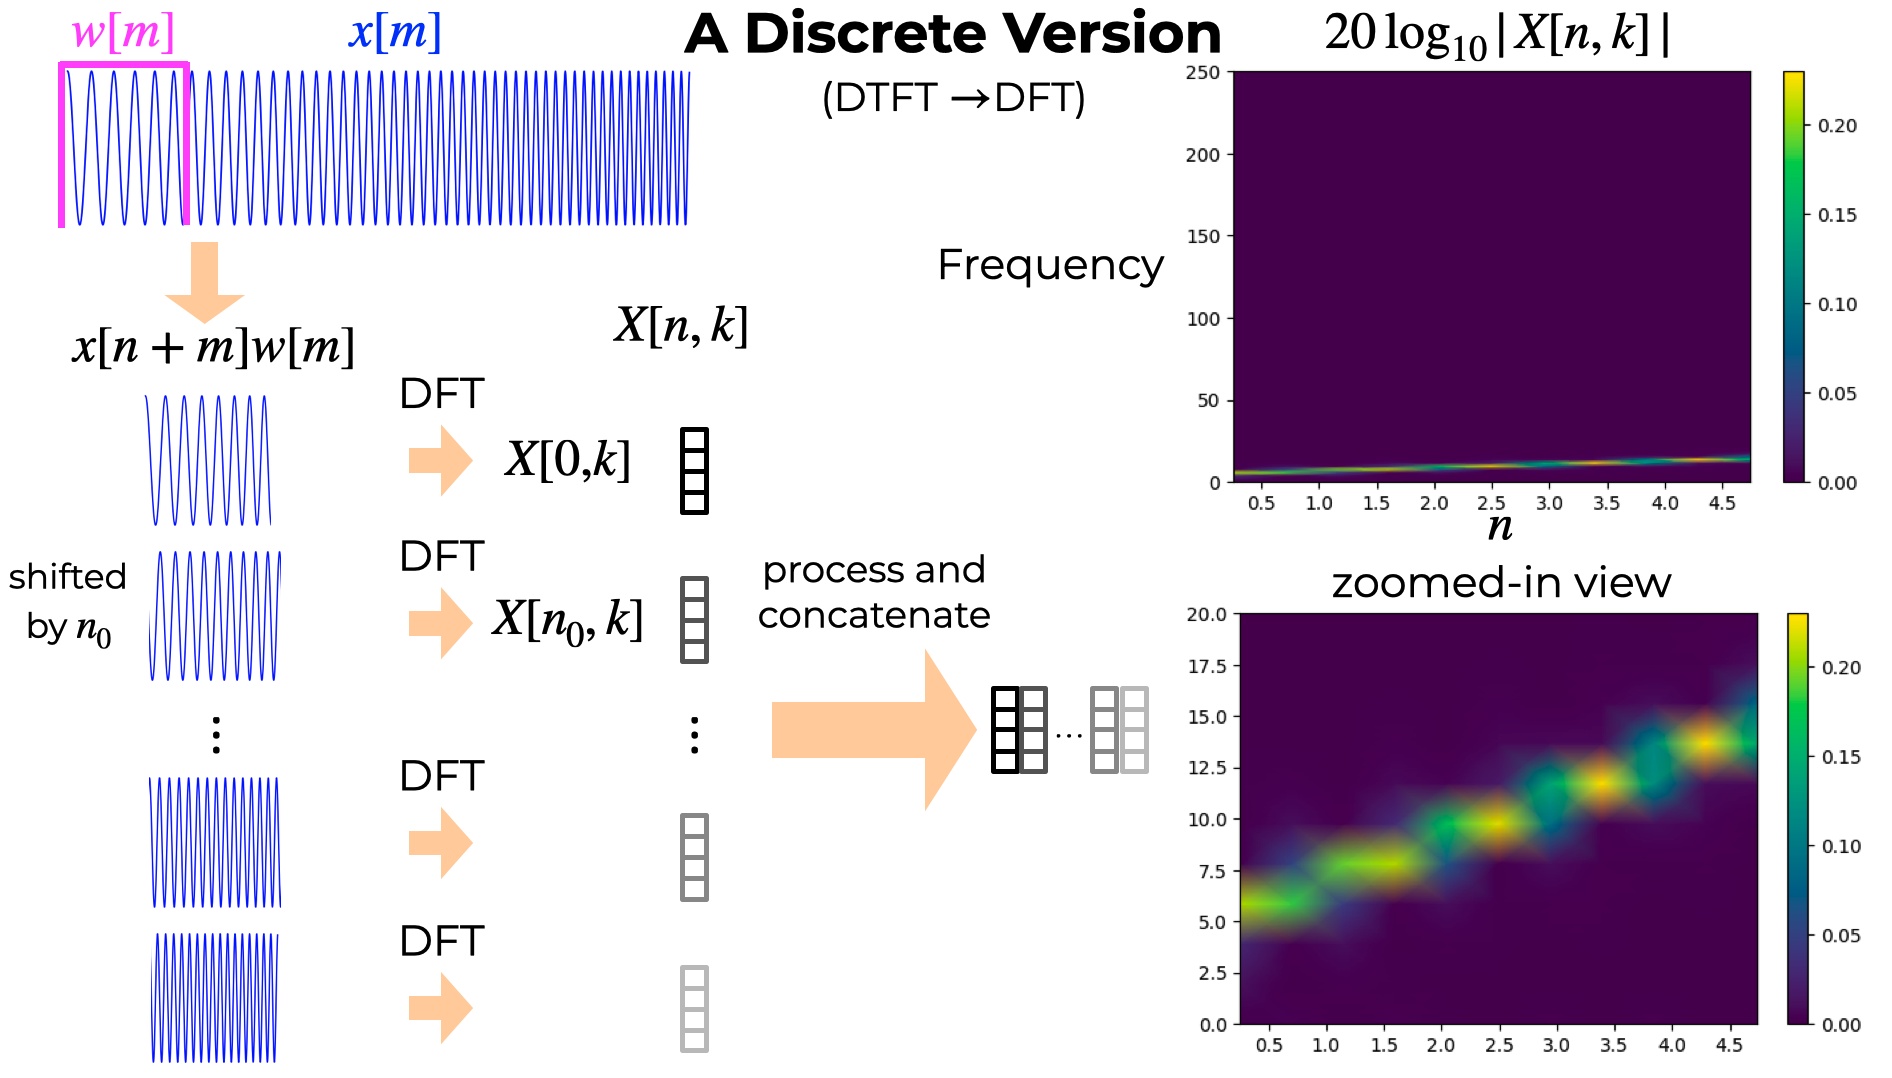

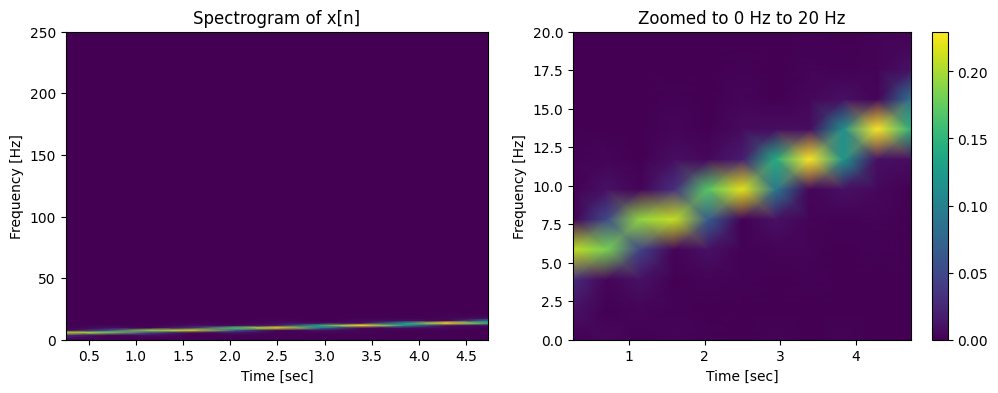

In [7]:
# กำหนดขนาดของแต่ละ time segment
num_pts_per_segment = 256

# คำนวณ spectrogram (อ้างอิงจาก https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html)
f, t, Sxx = spectrogram(x_chirp, f_s, nperseg=num_pts_per_segment)

# แสดงผล spectrogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of x[n]')

# แสดงผล spectrogram ที่ถูก zoom เข้าไปในบางบริเวณ
plt.subplot(1, 2, 2)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 20])
plt.title('Zoomed to 0 Hz to 20 Hz')
plt.colorbar()
plt.show()

1.   แท่งสีด้านขวาสุดของภาพ (colorbar) เป็นตัวบอกว่าสีอะไรหมายถึงค่าอะไร เช่น สีน้ำเงินเข้มหมายถึงมีค่าเป็น 0 ในขณะที่สีเหลืองหมายถึงมีค่าประมาณ 0.23


2.   หากสังเกต spectrogram จะพบว่า


*   มีสีน้ำเงินเข้มบริเวณความถี่ (แกน y) ที่มีค่ามากกว่า 20 Hz สำหรับทุกค่าเวลา (แกน x) แสดงให้เห็นว่า ใน time signal นี้ไม่มีความถี่ที่สูงกว่า 20 Hz เลย


*   มีสีเหลือง/เขียวบริเวณความถี่ (แกน y) ประมาณ 6 Hz  ในช่วงเวลา 0 ถึง 1 วินาที แสดงให้เห็นว่า time signal ในช่วงเวลาดังกล่าว มีค่าความถี่อยู่ที่แถว ๆ 6 Hz


*   มีสีเหลือง/เขียวบริเวณความถี่ (แกน y) ประมาณ 8 Hz ในช่วงเวลา 1 ถึง 2 วินาที แสดงให้เห็นว่า time signal ในช่วงเวลาดังกล่าว มีค่าความถี่อยู่ที่แถว ๆ 8 Hz


*   มีสีเหลือง/เขียวบริเวณค่าความถี่ประมาณ 10 Hz ในช่วงเวลา 2 ถึง 3 วินาที แสดงให้เห็นว่า time signal ในช่วงเวลาดังกล่าว มีค่าความถี่อยู่ที่แถวๆ 10 Hz


*   เมื่อเวลาผ่านไปตามแกน"เวลา" (แกน x) เราจะเห็นค่าในแกน y มีค่าสูงขึ้นเรื่อย ๆ จนไปจบที่ค่าประมาณ 15 Hz สอดคล้องกับ time signal ของเราที่กำหนดให้เป็น chirp signal ที่มีค่าความถี่เริ่มต้นที่ 5 Hz และมีค่าความถี่สูงขึ้นเรื่อยๆ จนไปถึงค่า 15 Hz ที่ระยะเวลา 5 วินาที


จะเห็นได้ว่าการวิเคราะห์ข้อมูลโดยดู spectrogram (time-frequency domain) ช่วยให้เราสามารถทำความเข้าใจ signal เราได้มากขึ้น เมื่อเปรียบเทียบกับการทำ DFT แบบมาตรฐาน โดยเฉพาะในกรณีที่ signal
ของเรามีลักษณะที่มีค่าความถี่เปลี่ยนไปขึ้นอยู่กับแกนเวลา (nonstationary signal)

<br><br>

---

เทคนิคนี้สามารถนำเอาไปใช้ในการวิเคราะห์ข้อมูล neuroscience ได้ในหลายประเภท ไม่ว่าจะเป็นไฟล์สัญญาณไฟฟ้าที่เก็บมาจากสมอง ไฟล์เสียงที่เก็บมาจากผู้ป่วย รวมถึงรูปภาพที่เก็บมาจากอุปกรณ์การถ่ายภาพทางการแพทย์ เช่น magnetic resonance image (MRI), computerised tomography (CT) หรือ X-ray


##  Trade-off Between Time and Frequency Resolution 

**ข้อสังเกตเพิ่มเติม**

จาก video lecture ที่เราเรียนรู้ properties ของ DFT ใน tutorial ที่แล้ว เราได้เห็นแล้วว่า time domain และ frequency domain มันมี inverse relationship กันอยู่


ในการใช้ STFT มันมี tradeoff ระหว่าง time resolution และ frequency resolution อยู่เช่นกัน

**ตัวอย่าง**

1.   ถ้าเราเลือกให้แต่ละ segment มีจำนวนจุดน้อยเราจะสามารถระบุตำแหน่งในแกนเวลาได้ดี แต่เราจะเสีย resolution ในแกน frequency ไป (เราจะไม่สามารถบอกได้ชัดเจนว่าในแต่ละเวลา มีค่าความถี่เป็นเท่าไหร่ได้ด้วยความแม่นยำสูง) - **ภาพเบลอในแกนความถี่**

2.   ถ้าเราเลือกให้แต่ละ segment มีจำนวนจุดมาก เราจะสามารถระบุตำแหน่งในแกน frequency ได้ดี แต่เราจะเสีย resolution ในแกน time ไป (เราจะไม่สามารถบอกได้ชัดเจนว่าความถี่แต่ละอัน มันเกิดขึ้นตรงไหนในแกนเวลาได้ด้วยความแม่นยำสูง) - **ภาพเบลอในแกนเวลา**



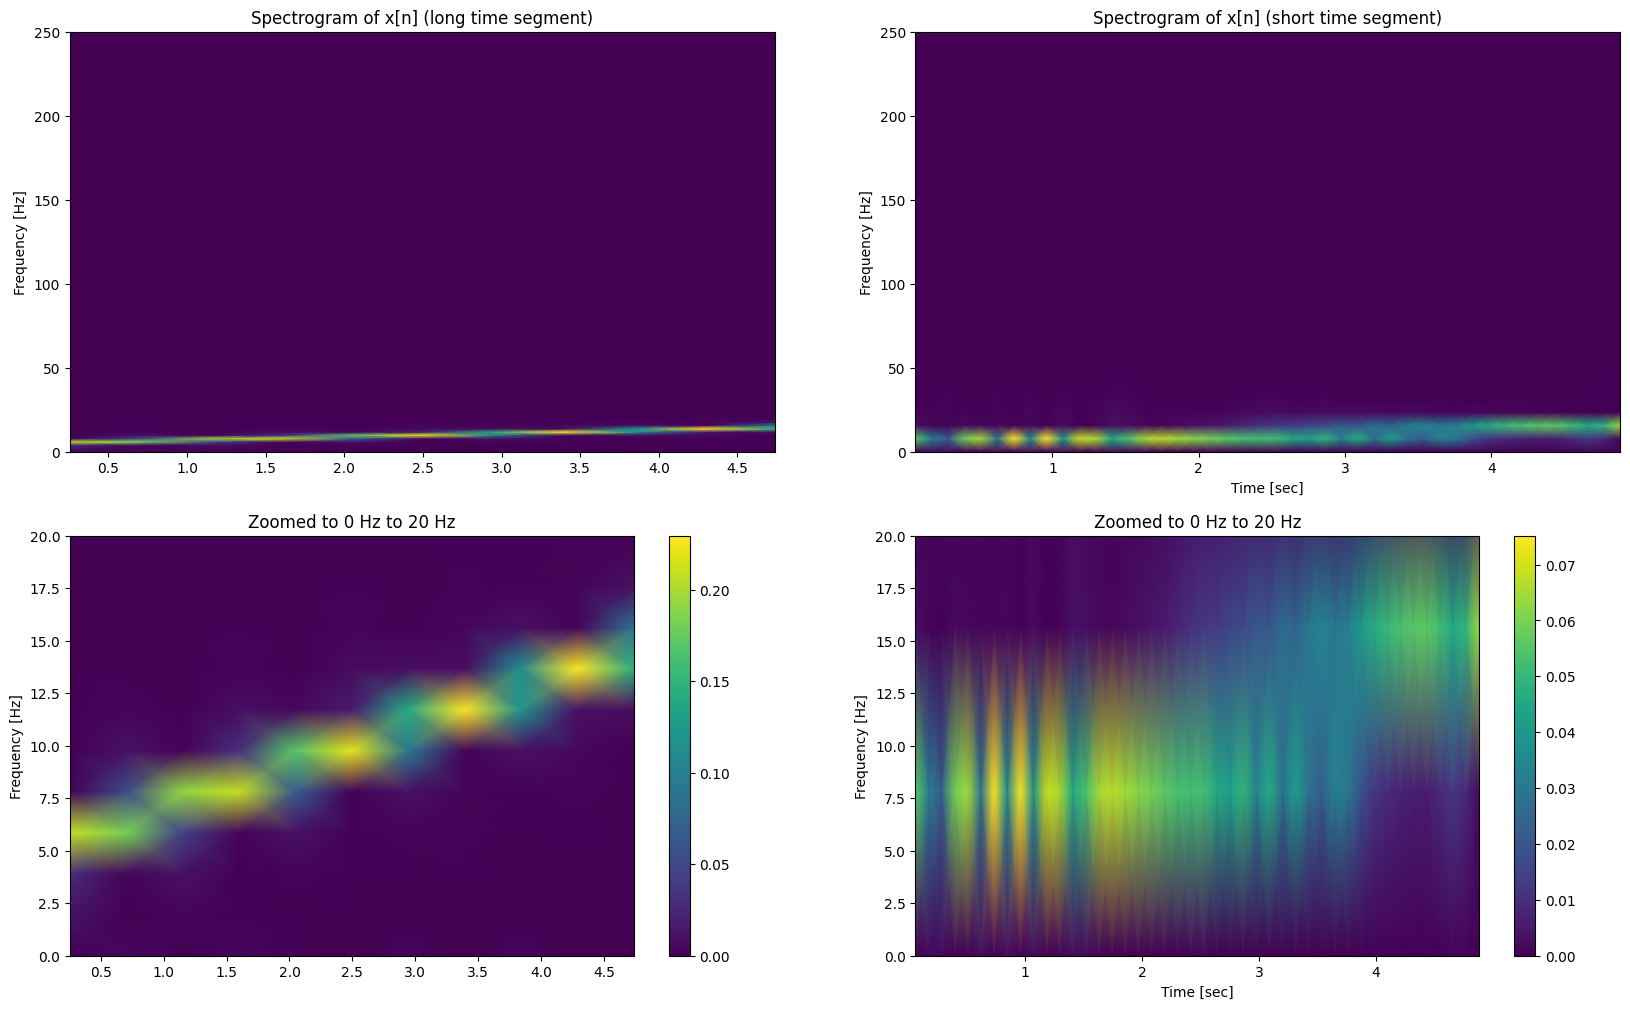

In [8]:
# กำหนดขนาดของแต่ละ time segment
num_pts_per_segment_long = 256

# คำนวณ spectrogram (อ้างอิงจาก https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html)
f_long_seg, t_long_seg, Sxx_long_seg = spectrogram(x_chirp, f_s, nperseg=num_pts_per_segment_long)

# แสดงผล
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(t_long_seg, f_long_seg, Sxx_long_seg, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram of x[n] (long time segment)')

plt.subplot(2, 2, 3)
plt.pcolormesh(t_long_seg, f_long_seg, Sxx_long_seg, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.ylim([0, 20])
plt.title('Zoomed to 0 Hz to 20 Hz')
plt.colorbar()

# กำหนดขนาดของ time segment ให้เล็กลง
num_pts_per_segment_short = 64

# คำนวณ spectrogram (อ้างอิงจาก https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html)
f_short, t_short, Sxx_short = spectrogram(x_chirp, f_s, nperseg=num_pts_per_segment_short)

# แสดงผล spectrogram
plt.subplot(2, 2, 2)
plt.pcolormesh(t_short, f_short, Sxx_short, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of x[n] (short time segment)')

# แสดงผล spectrogram ที่ถูก zoom เข้าไปในบางบริเวณ
plt.subplot(2, 2, 4)
plt.pcolormesh(t_short, f_short, Sxx_short, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 20])
plt.title('Zoomed to 0 Hz to 20 Hz')
plt.colorbar()
plt.show()

**ผู้จัดเตรียม code ใน tutorial**: ดร. อิทธิ ฉัตรนันทเวช